In [1]:
cd ~/work/waroncars

/media/wintermute/work/waroncars


In [13]:
plt = plotter()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
colors = mpl.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
import toml
import seaborn as sns

In [4]:
import analyzer

In [5]:
config = toml.load('config.toml')

In [42]:
paths = analyzer.date_range(min_time='2022-01-06', max_time='2022-01-06')

In [43]:
tracks = analyzer.load_track(paths)

In [50]:
info = analyzer.track_info(data=tracks).sort_values(by='time')
info['hour'] = info['time'].dt.hour
info = info[info['label'] == 'car']
info = info[info['r2'] >= 0.75]
info = info[info['frames'] >= 5]
info1 = info[(info['hour'] <= 11) & (info['hour'] >= 7)]

In [51]:
info.describe()

,frames,Δt,Δx,Δy,v,σ,r2,hour
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,16.609195,1.150422,0.542145,0.058034,16.016393,0.634185,0.943631,9.936782
std,12.111578,0.794791,0.081769,0.018496,4.369996,0.444956,0.047533,2.188124
min,5.000000,0.479847,0.278906,0.019444,1.579938,0.040915,0.750123,5.000000
25%,12.000000,0.839701,0.494421,0.044792,13.849821,0.328041,0.926442,8.000000
50%,15.000000,1.012154,0.548999,0.055208,16.089711,0.497942,0.960055,10.500000
75%,18.000000,1.202999,0.604468,0.069965,18.771698,0.839649,0.977036,12.000000
max,145.000000,9.754318,0.704883,0.133681,30.273725,2.777284,0.991073,13.000000


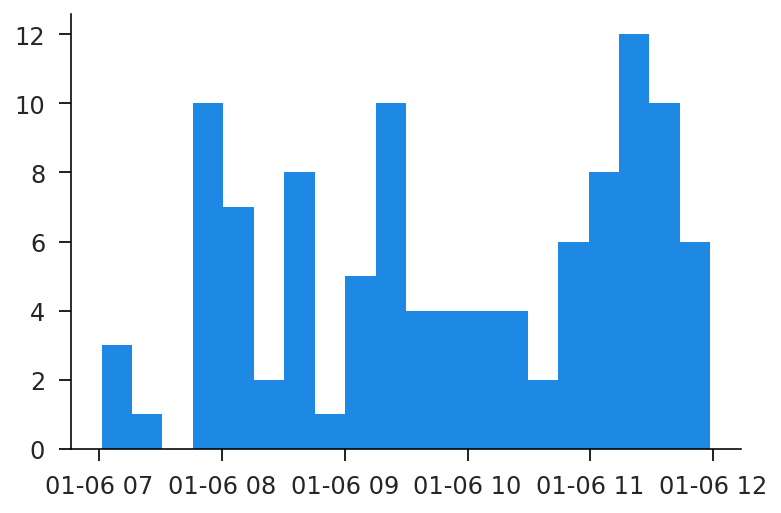

In [52]:
info1['time'].hist(bins=20);

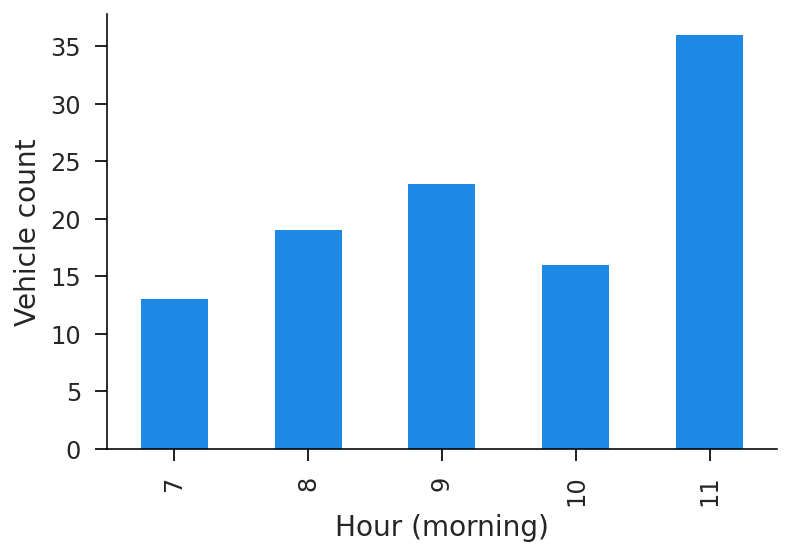

In [53]:
fig, ax = plt.subplots()
counts = info1.groupby('hour').size()
counts.plot.bar(ax=ax);
ax.set_ylabel('Vehicle count'); ax.set_xlabel('Hour (morning)');
# fig.savefig('output/hourly_counts.svg', bbox_inches='tight');

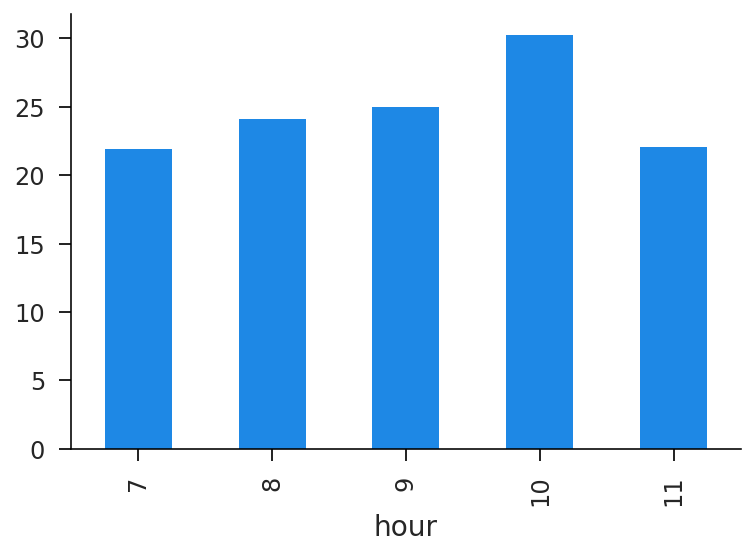

In [54]:
info1.groupby('hour')['v'].max().plot.bar();

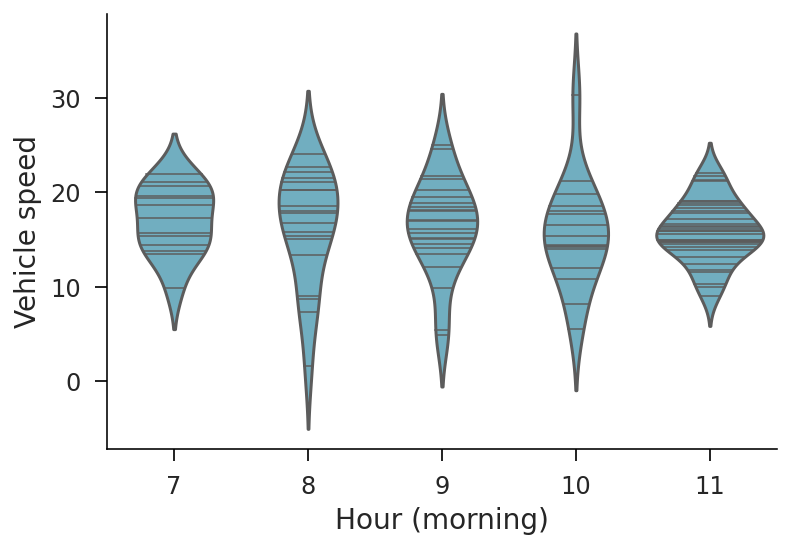

In [55]:
fig, ax = plt.subplots()
sns.violinplot(x='hour', y='v', inner='stick', color=colors[5], linewidth=1.5, data=info1, ax=ax);
ax.set_ylabel('Vehicle speed'); ax.set_xlabel('Hour (morning)');
# fig.savefig('output/hourly_speed.svg', bbox_inches='tight');

In [56]:
tr = analyzer.load_track('tracks/20220103T123935_car_1602.csv')

In [57]:
fov = config['scene']['width'], config['scene']['height']

In [58]:
analyzer.calc_speed(tr, fov)

(19.00728613580026, 0.4465307898558331)